In [2]:
# Importing the libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading the data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

# cleaning data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Question
In our project we want to analyze salary data. Here's what we'll be focusing on:

- Visualize for highest paying skills
- Visualize for highest demanded skills

In [70]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')


In [ ]:
df_DA_US_stats = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])

top_median = df_DA_US_stats.sort_values('median',ascending=False).head(10)

top_demanded = df_DA_US_stats.sort_values('count',ascending=False).head(10).sort_values('median',ascending=False) # sorting the top10 demanded skill based on salary

I was comparing them based on the median salary, so once I got the top 10 demanded skill, I sorted them based on salary just for visualisation purposes

(after I limited the count of skills I sorted them based on median salary)

In [95]:
top_demanded, top_median

(              median  count
 job_skills                 
 python      97500.00   1431
 tableau     92875.00   1364
 r           92500.00    893
 sql server  92500.00    286
 sql         91000.00   2508
 sas         90000.00    926
 power bi    90000.00    838
 powerpoint  85000.00    462
 excel       84392.00   1808
 word        81194.75    461,
                 median  count
 job_skills                   
 dplyr         196250.0      2
 bitbucket     189000.0      3
 gitlab        186000.0      3
 solidity      179000.0      1
 hugging face  175000.0      1
 couchbase     160515.0      1
 ansible       159640.0      1
 mxnet         149000.0      2
 cassandra     148250.0      6
 vmware        147500.0      1)

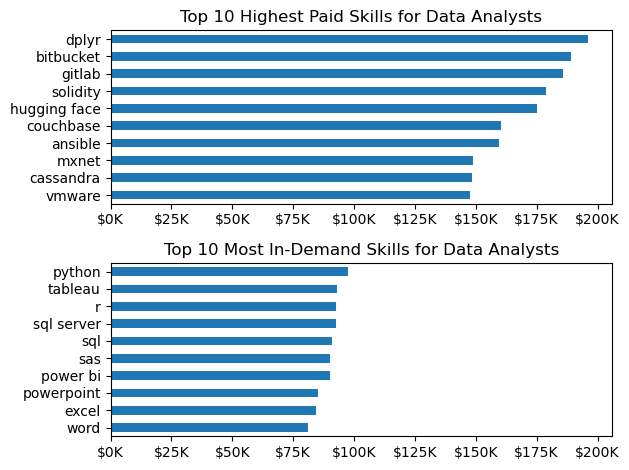

In [ ]:
fig,ax = plt.subplots(2,1)

# in pandas.plot if the dataframe has an index it will be the dafault x axis
top_median[::-1].plot(kind='barh', y= 'median', ax= ax[0], legend= False)

top_demanded[::-1].plot(kind='barh', y= 'median', ax= ax[1], legend= False)

# the order of the x axis the count of both dataframe
# ax[0].invert_yaxis()
# ax[1].invert_yaxis()
# [::-1]
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()

Inverting the y axis
- `[::-1]`
- `ax[0].invert_yaxis()`
- `ax[1].invert_yaxis()`
- `plt.gca().invert_yaxis()`

In pandas.plot if the dataframe has an index it will be the dafault x axis

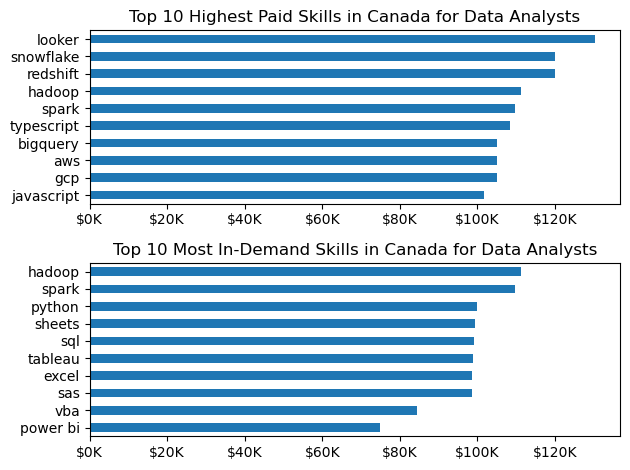

In [101]:
# Only get data analyst jobs in the Canada
df_DA_C = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_C = df_DA_C.dropna(subset=['salary_year_avg'])

df_DA_C = df_DA_C.explode('job_skills')




df_DA_C = df_DA_C.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])

top_median = df_DA_C.sort_values('median',ascending=False).head(10)

top_demanded = df_DA_C.sort_values('count',ascending=False).head(10).sort_values('median',ascending=False) # sorting the top10 demanded skill based on salary





fig,ax = plt.subplots(2,1)

# in pandas.plot if the dataframe has an index it will be the dafault x axis
top_median[::-1].plot(kind='barh', y= 'median', ax= ax[0], legend= False)

top_demanded[::-1].plot(kind='barh', y= 'median', ax= ax[1], legend= False)

# the order of the x axis the count of both dataframe
# ax[0].invert_yaxis()
# ax[1].invert_yaxis()
# [::-1]
ax[0].set_title('Top 10 Highest Paid Skills in Canada for Data Analysts')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

ax[1].set_title('Top 10 Most In-Demand Skills in Canada for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()